In [50]:
import warnings 
warnings.filterwarnings('ignore')

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

%matplotlib inline
sns.set_style("whitegrid")
sns.set(font_scale=2)

In [52]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.00,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.10,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.60,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.00,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.90,1,3,2,0


In [53]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [54]:
pd.set_option('display.float_format', '{:.2f}'.format)
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [55]:
data.mean()


age         54.43
sex          0.70
cp           0.94
trestbps   131.61
chol       246.00
fbs          0.15
restecg      0.53
thalach    149.11
exang        0.34
oldpeak      1.07
slope        1.39
ca           0.75
thal         2.32
target       0.51
dtype: float64

In [56]:
categorical_values = []
for column in data.columns:
    print('==============================')
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_values.append(column)

age : [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
sex : [1 0]
cp : [0 1 2 3]
trestbps : [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
chol : [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 407 290 277 262 195 166 178 141]
fbs :

In [57]:
categorical_values

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

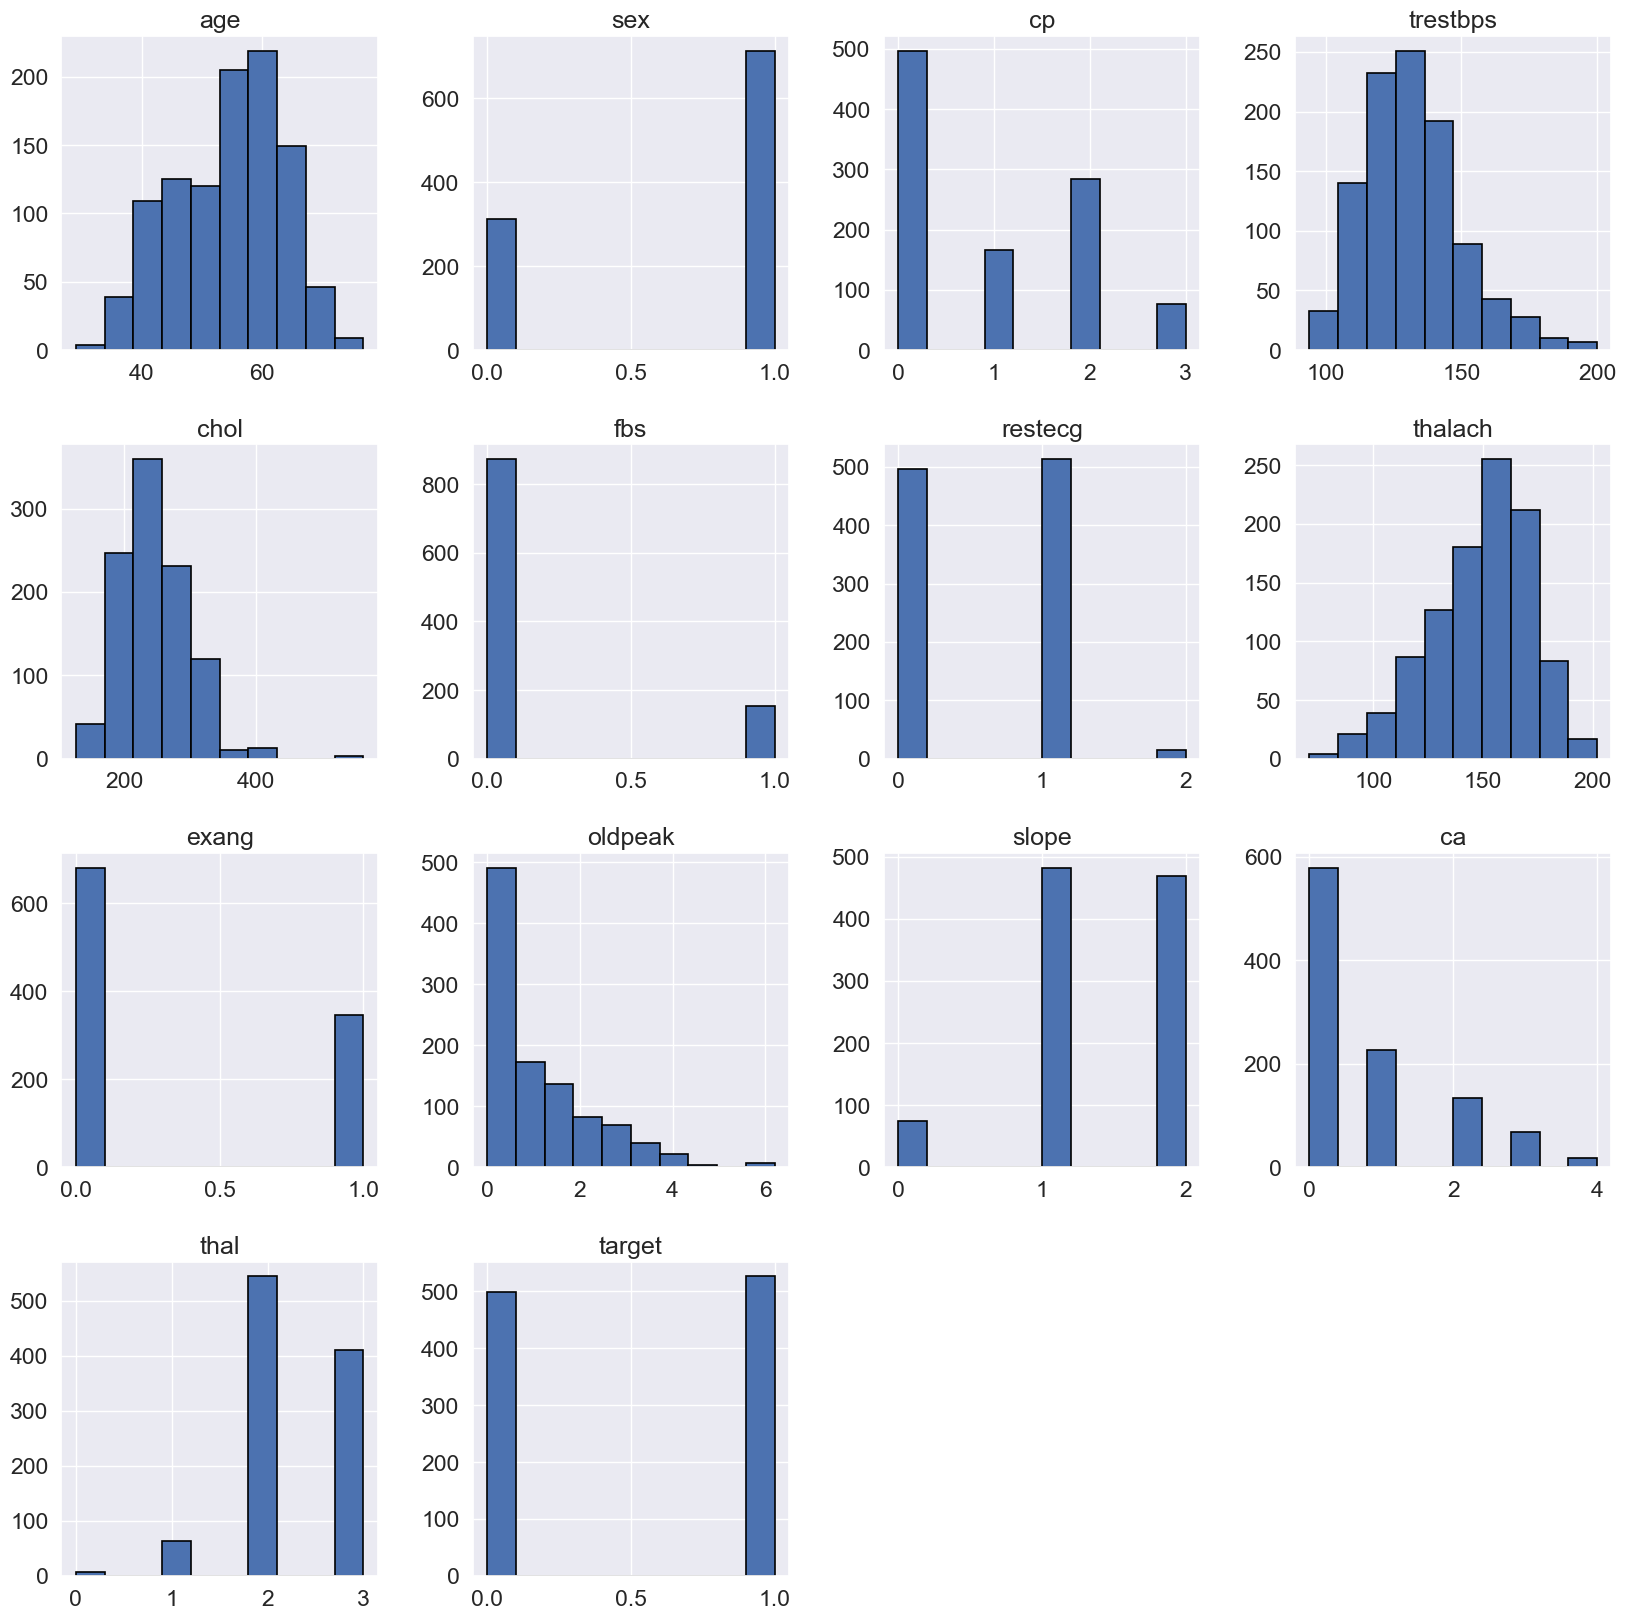

In [58]:
sns.set(font_scale=1.5)
data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

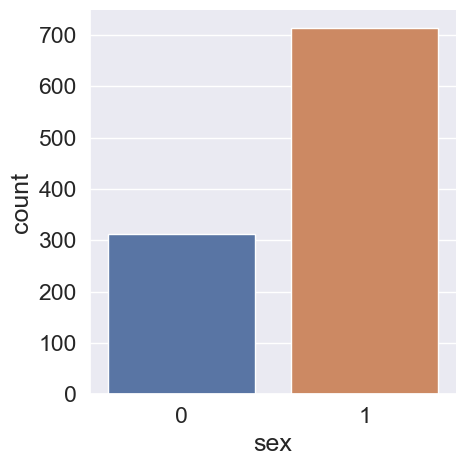

In [59]:
sns.catplot('sex', data=data, kind='count')

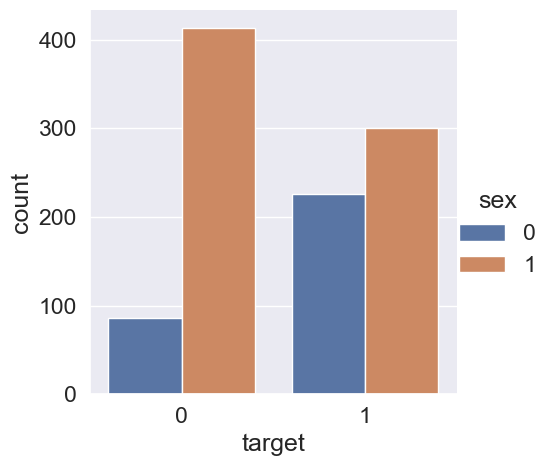

In [60]:
sns.catplot('target', data=data, hue='sex', kind='count')


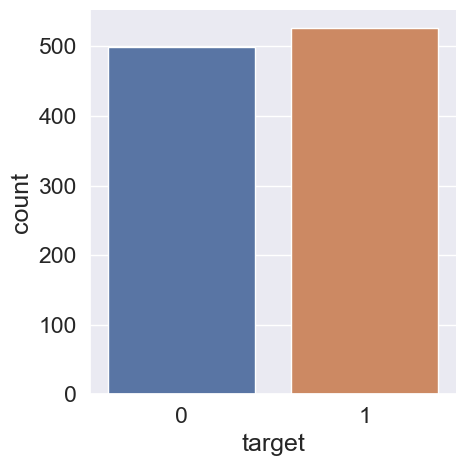

In [61]:
sns.catplot('target', data=data, kind='count')

<AxesSubplot:>

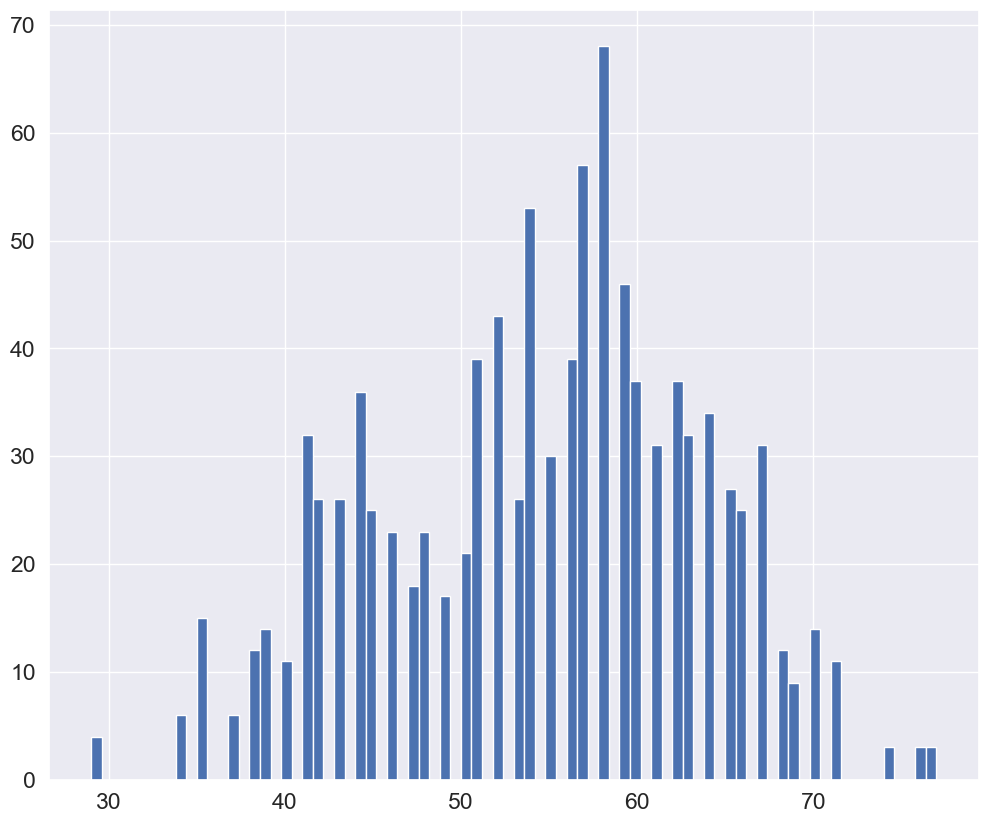

In [62]:
plt.figure(figsize=(12, 10))
data.age.hist(bins=80)

In [63]:
print(f"The most of the patients have a mean age of : {data.age.mean()}")

The most of the patients have a mean age of : 54.43414634146342


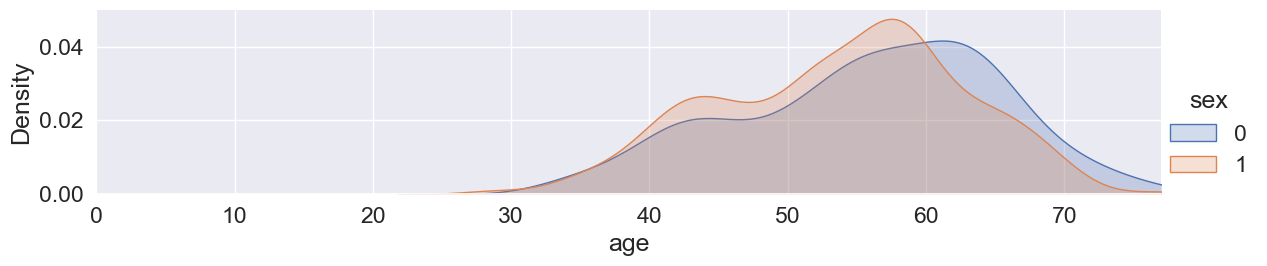

In [64]:
fig = sns.FacetGrid(data, hue="sex", aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = data['age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

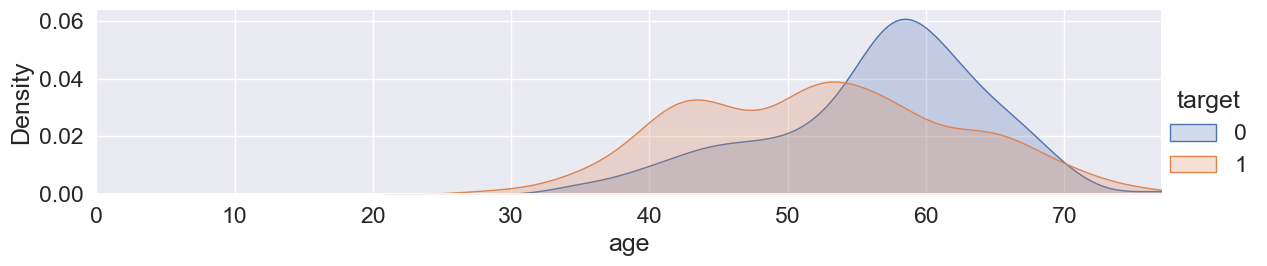

In [65]:
fig = sns.FacetGrid(data, hue="target", aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = data['age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()


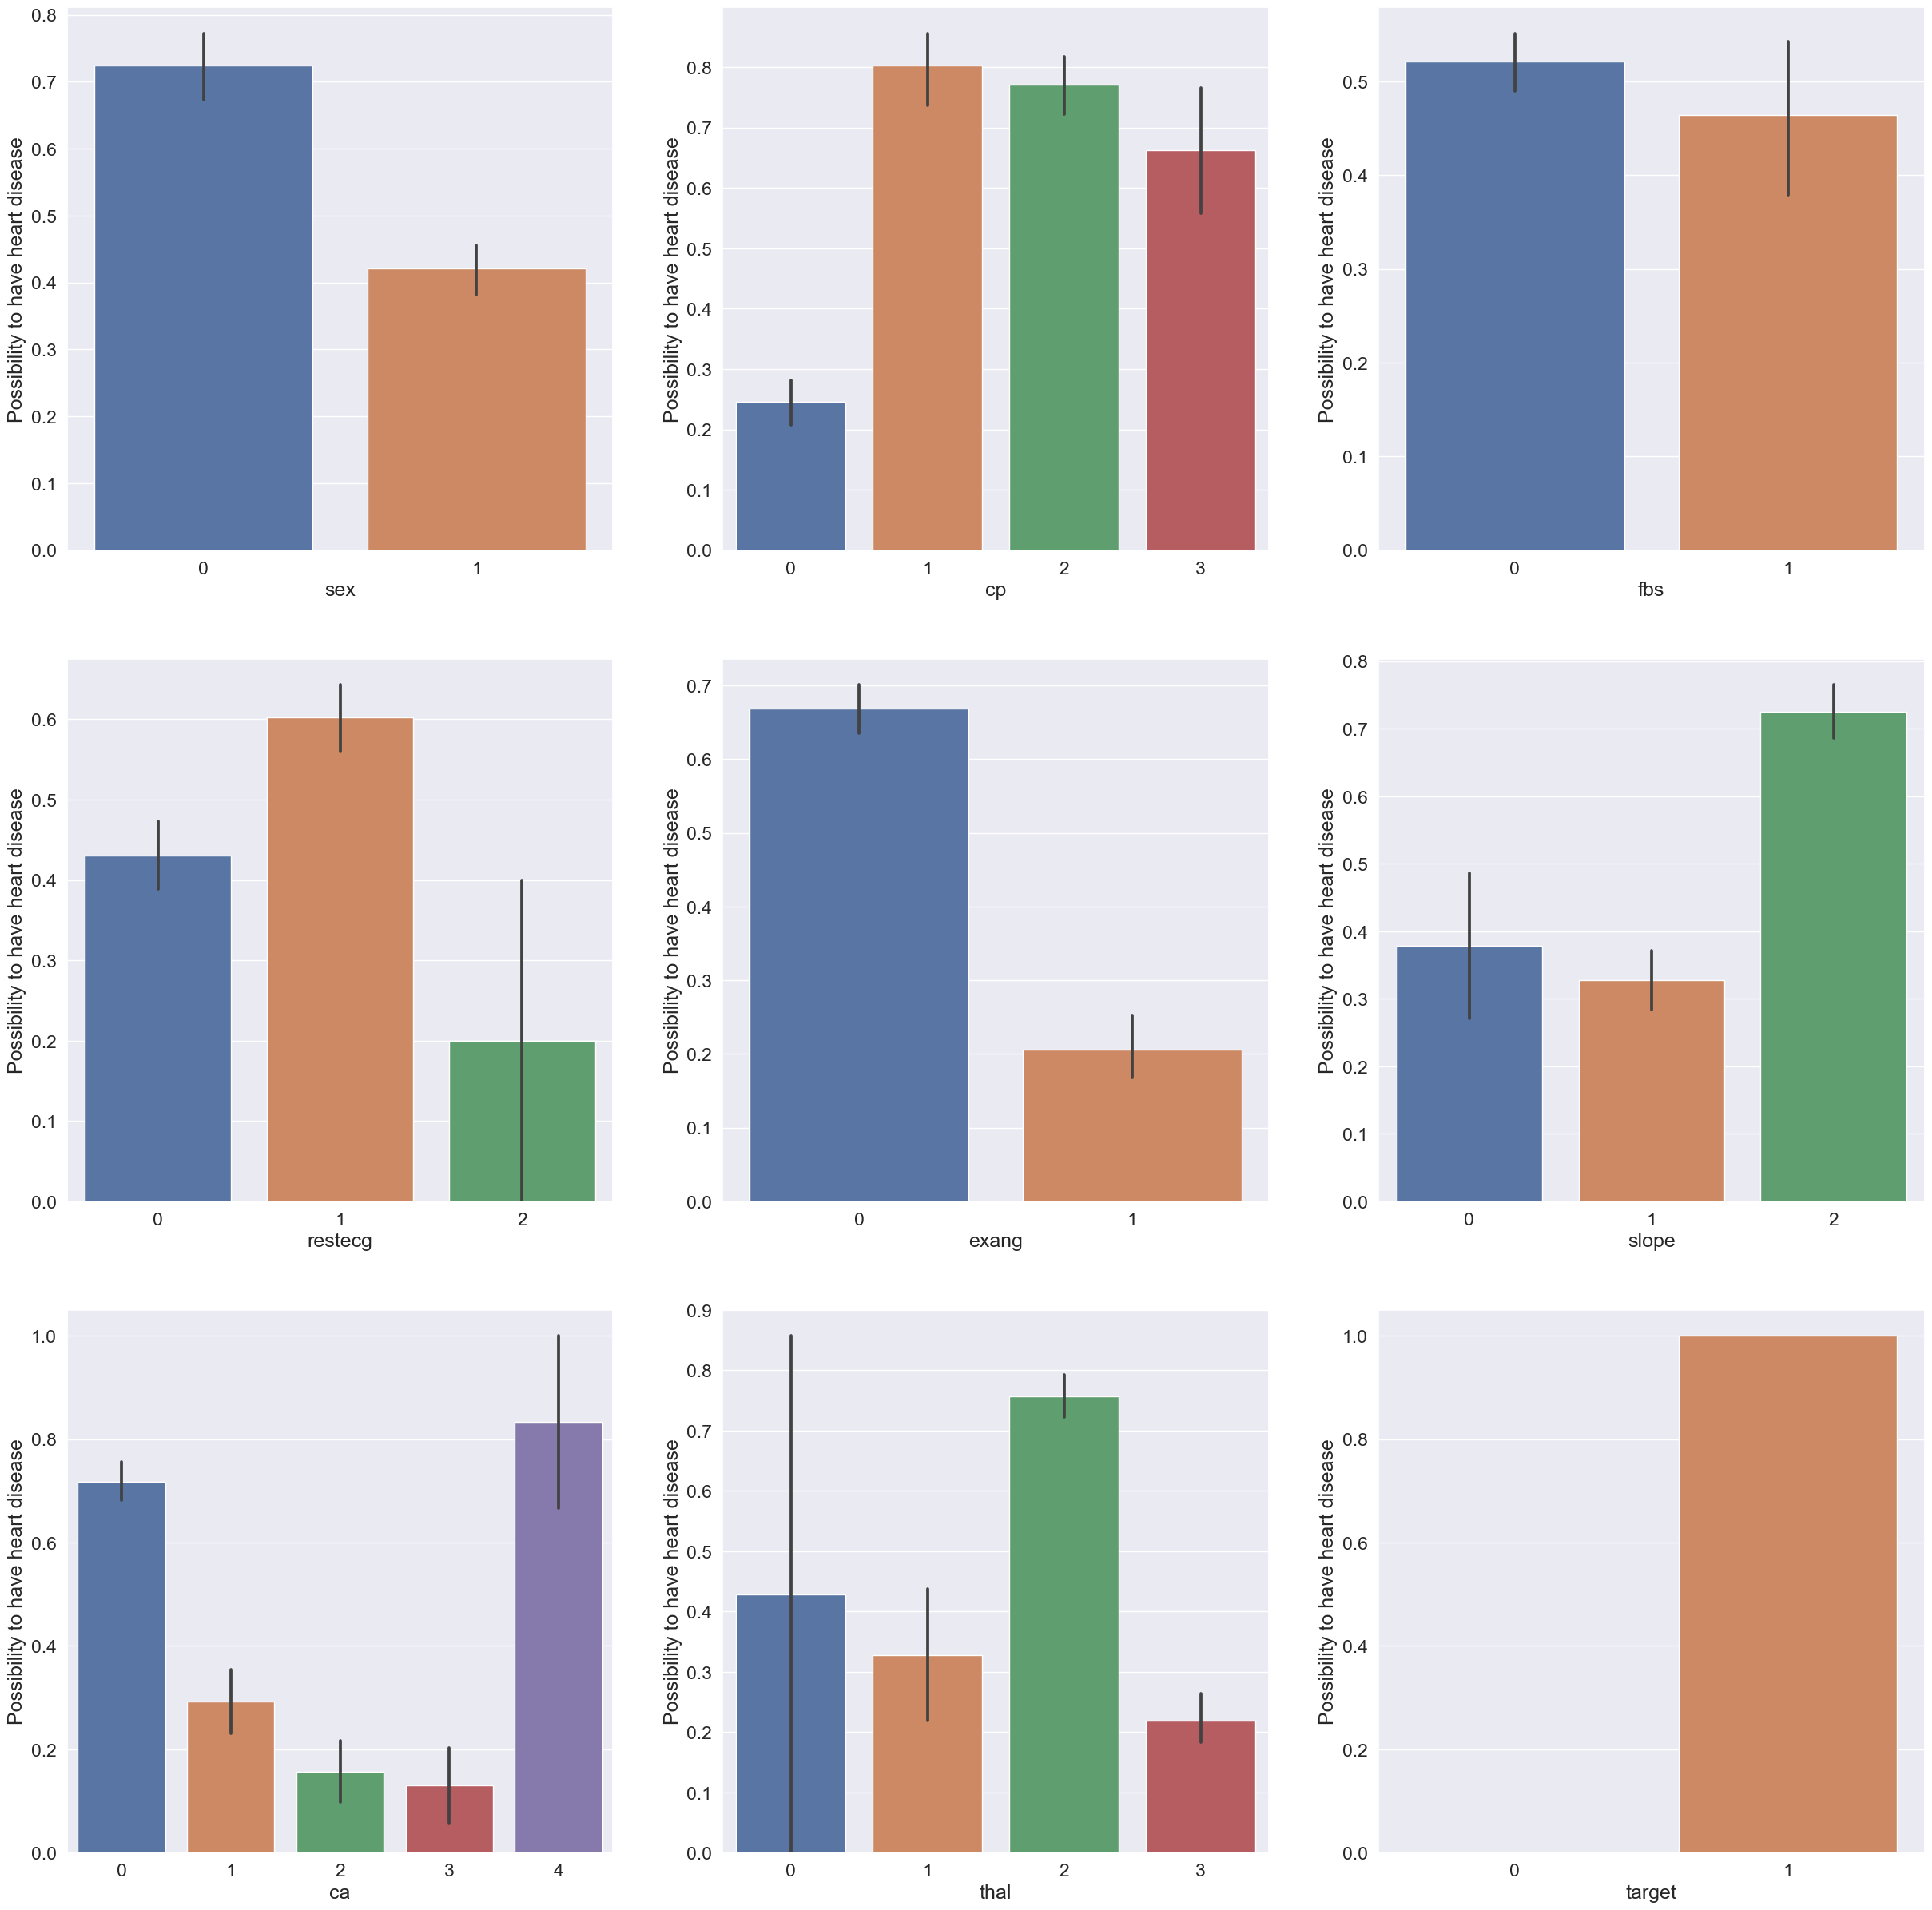

In [66]:
plt.figure(figsize=(30, 30))
for i, column in enumerate(categorical_values, 1):
    plt.subplot(3, 3, i)
    sns.barplot(x=f"{column}", y='target', data=data)
    plt.ylabel('Possibility to have heart disease')
    plt.xlabel(f'{column}')

<AxesSubplot:>

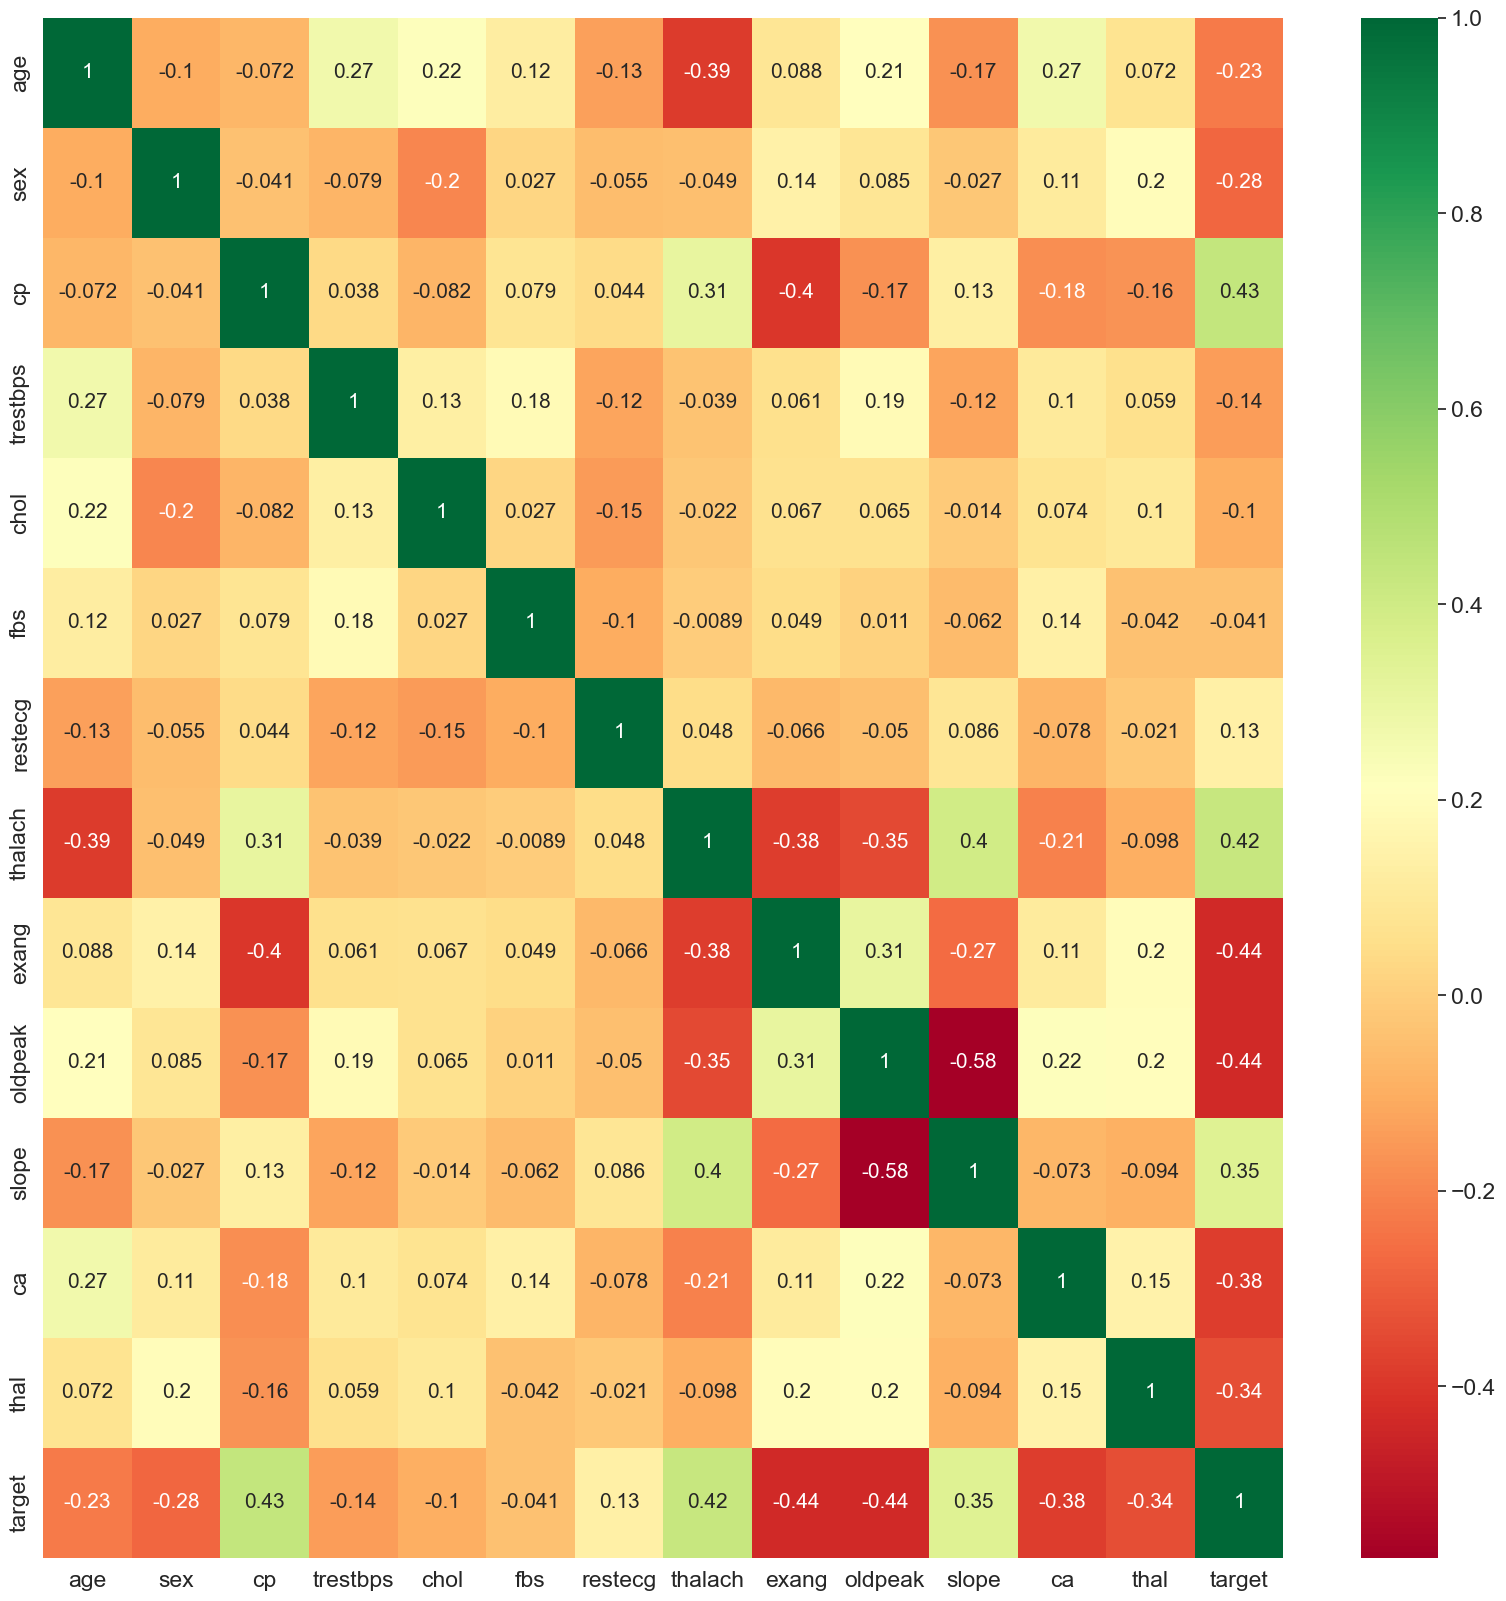

In [67]:
corr_matrix = data.corr()
top_corr_feature = corr_matrix.index
plt.figure(figsize=(20, 20))
sns.heatmap(data[top_corr_feature].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

In [68]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [69]:
X = data.drop(columns='target', axis=1)
Y = data['target']

In [70]:
print(X)


      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0     1.00   
1      53    1   0       140   203    1        0      155      1     3.10   
2      70    1   0       145   174    0        1      125      1     2.60   
3      61    1   0       148   203    0        1      161      0     0.00   
4      62    0   0       138   294    1        1      106      0     1.90   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1     0.00   
1021   60    1   0       125   258    0        0      141      1     2.80   
1022   47    1   0       110   275    0        0      118      1     1.00   
1023   50    0   0       110   254    0        0      159      0     0.00   
1024   54    1   0       120   188    0        1      113      0     1.40   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [71]:
print(Y)


0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


In [72]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [73]:
print(X.shape, x_train.shape, x_test.shape)

(1025, 13) (820, 13) (205, 13)


In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
train_acc=[]
test_acc=[]

for k in range(1,31):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    # training time accuracy
    train_acc.append(model.score(x_train,y_train))
    # test time accuracy
    test_acc.append(model.score(x_test,y_test))

In [76]:
train_acc

[1.0,
 0.9963414634146341,
 0.9926829268292683,
 0.9365853658536586,
 0.9060975609756098,
 0.823170731707317,
 0.7548780487804878,
 0.7560975609756098,
 0.751219512195122,
 0.7646341463414634,
 0.7670731707317073,
 0.7609756097560976,
 0.7634146341463415,
 0.7719512195121951,
 0.7780487804878049,
 0.775609756097561,
 0.7634146341463415,
 0.7670731707317073,
 0.7634146341463415,
 0.7548780487804878,
 0.7402439024390244,
 0.7414634146341463,
 0.7463414634146341,
 0.7390243902439024,
 0.7268292682926829,
 0.723170731707317,
 0.7280487804878049,
 0.7170731707317073,
 0.7207317073170731,
 0.7121951219512195]

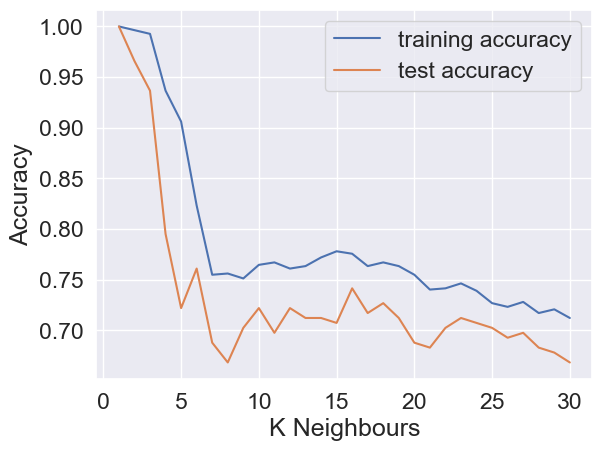

In [77]:
plt.plot(range(1,31), train_acc,label="training accuracy")
plt.plot(range(1,31),test_acc,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("K Neighbours")
plt.legend()
plt.savefig("KNN Comparison Models")

In [78]:
knn_model=KNeighborsClassifier(n_neighbors=30)
knn_model.fit(x_train,y_train)
train_accuracy=knn_model.score(x_train,y_train)
test_accuracy=knn_model.score(x_test,y_test)
print("Accuracy in Training: ",train_accuracy)
print("Accuracy in testing: ", test_accuracy)

Accuracy in Training:  0.7121951219512195
Accuracy in testing:  0.6682926829268293


In [79]:
x_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [80]:
d=61,1,0,148,203,0,1,161,0,0.00,2,1,3 
pred=knn_model.predict([d])[0]
if pred==0:
    print("Prediction: Not Suffering With heart disease")
else:
    print("Prediction: Suffering With heart disease")

Prediction: Suffering With heart disease


In [81]:
d= 3,61,1,0,148,203,0,1,161,0,2,1,3
pred=knn_model.predict([d])[0]
if pred==0:
    print("Prediction: Not Suffering With heart disease")
else:
    print("Prediction: Suffering With heart disease")

Prediction: Not Suffering With heart disease


In [82]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [83]:
print("Training Acc: ",rf_model.score(x_train, y_train))
print("Test Acc: ",rf_model.score(x_test, y_test))

Training Acc:  1.0
Test Acc:  1.0


In [84]:
from sklearn.metrics import confusion_matrix, accuracy_score,r2_score, classification_report

In [85]:

print (" Confusion Matrix for Random Forest: ")
rf_conf_mat = confusion_matrix(y_test,rf_model.predict(x_test))
print (rf_conf_mat)
print (" Confusion Matrix for KNN: ")
knn_conf_mat = confusion_matrix(y_test,knn_model.predict(x_test))
print (knn_conf_mat)


 Confusion Matrix for Random Forest: 
[[100   0]
 [  0 105]]
 Confusion Matrix for KNN: 
[[66 34]
 [34 71]]


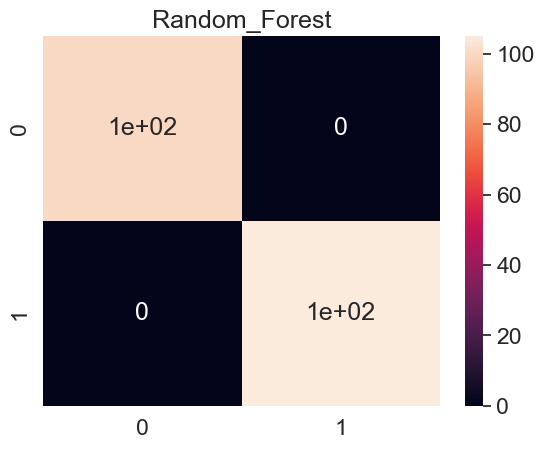

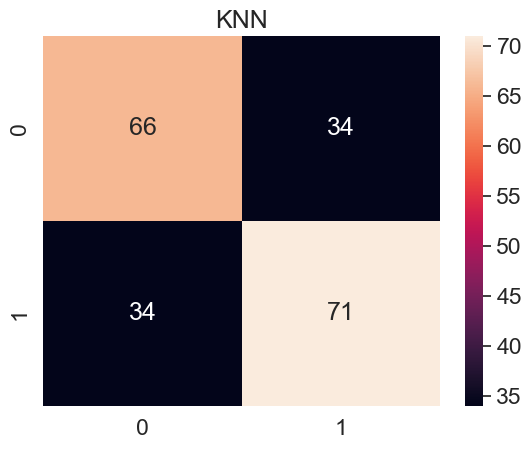

In [86]:
conf_mat_final = { 'Random_Forest': rf_conf_mat,'KNN': knn_conf_mat}
for label,matrix in conf_mat_final.items():
    plt.title (label)
    sns.heatmap(matrix, annot=True)
    plt.show()

In [87]:

print (" classification report for Random Forest: ")
print (classification_report(y_test,rf_model.predict(x_test)))
print (" classification report for KNN: ")
print (classification_report(y_test,knn_model.predict(x_test)))


 classification report for Random Forest: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

 classification report for KNN: 
              precision    recall  f1-score   support

           0       0.66      0.66      0.66       100
           1       0.68      0.68      0.68       105

    accuracy                           0.67       205
   macro avg       0.67      0.67      0.67       205
weighted avg       0.67      0.67      0.67       205



In [88]:
knn_acc = accuracy_score (y_test, knn_model.predict(x_test))
print ("Accuracy for KNN Model: ")
knn_acc

Accuracy for KNN Model: 


0.6682926829268293

In [89]:
rf_acc = accuracy_score (y_test, rf_model.predict(x_test))
print ("Accuracy for Random Forest Model: ")
rf_acc

Accuracy for Random Forest Model: 


1.0

In [90]:
score = {'Random_Forest': [rf_acc],'KNN': [knn_acc]}
score_df = pd.DataFrame(score)
score_df

,Random_Forest,KNN
0,1.00,0.67


<AxesSubplot:>

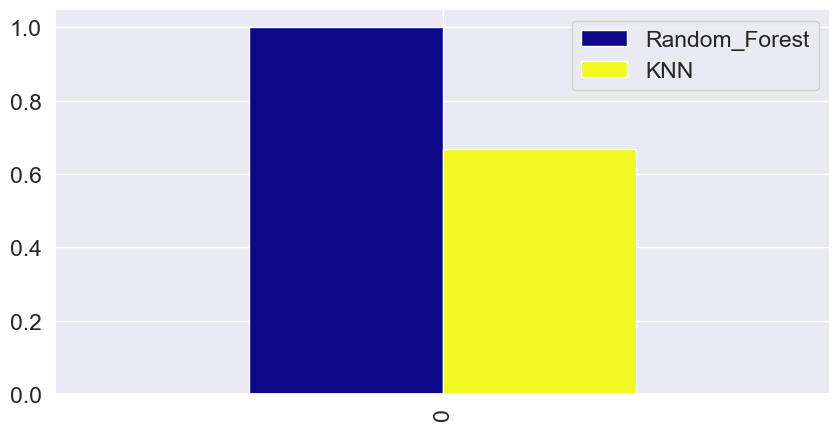

In [91]:
score_df.plot(kind='bar', figsize=(10, 5), colormap='plasma')